# Import the necessary libraries

In [ ]:
#tsne on mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
pip install opentsne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.6 MB/s eta 0:00:00


# Import data , explore and preprocess

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/My Drive/Colab Notebooks/train.csv"
df=pd.read_csv(path)


In [ ]:
print(df.head(4))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  

[4 rows

In [ ]:
l=df['label']
d = df.drop("label", axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
 
standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

(42000, 784)


# Data visualization using T-SNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


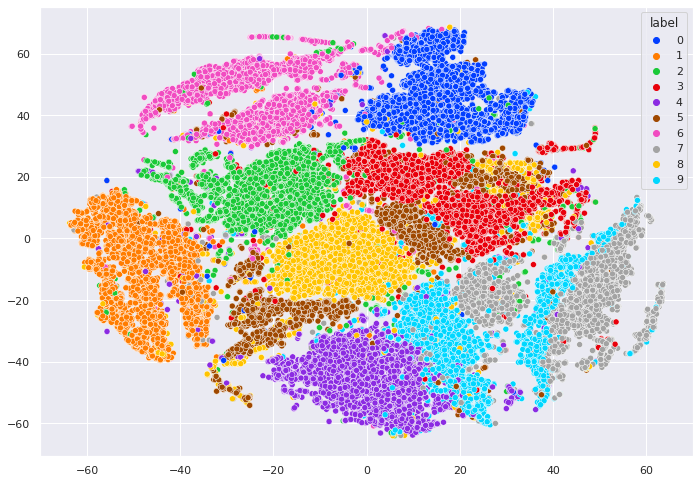

In [ ]:

from sklearn.manifold import TSNE
import seaborn as sn

model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(standardized_data)
tsne_data = np.vstack((tsne_data.T, l)).T

sn.set(rc={'figure.figsize':(11.7,8.27)})
palette = sn.color_palette("bright", 10)
sn.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=l, legend='full', palette=palette)

# Data visualization using OPENtsne

Import the modules

In [ ]:
from openTSNE import TSNE
import seaborn as sns
from sklearn.model_selection import train_test_split
from openTSNE import TSNEEmbedding
from openTSNE import affinity
from openTSNE import initialization


In [ ]:
l=l.to_numpy()
d=d.to_numpy()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(d,l,test_size=0.3)

# Prepare the reference embedding 

In [ ]:
#here we are using x_train as reference and then embedding x_test to it
%%time
affinities_train = affinity.PerplexityBasedNN(
    x_train,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 84.89 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.64 seconds
CPU times: user 2min 19s, sys: 1.5 s, total: 2min 20s
Wall time: 1min 26s


In [ ]:
%time init_train = initialization.pca(x_train, random_state=42)

CPU times: user 3.23 s, sys: 2.01 s, total: 5.24 s
Wall time: 2.92 s


In [ ]:
embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    verbose=True,
)

In [ ]:
%time embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.5)

===> Running optimization with exaggeration=12.00, lr=2450.00 for 250 iterations...
Iteration   50, KL divergence 5.8969, 50 iterations in 3.1134 sec
Iteration  100, KL divergence 5.4561, 50 iterations in 4.5344 sec
Iteration  150, KL divergence 5.3703, 50 iterations in 3.9441 sec
Iteration  200, KL divergence 5.3391, 50 iterations in 3.0149 sec
Iteration  250, KL divergence 5.3246, 50 iterations in 3.0931 sec
   --> Time elapsed: 17.70 seconds
CPU times: user 24.3 s, sys: 122 ms, total: 24.4 s
Wall time: 17.8 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


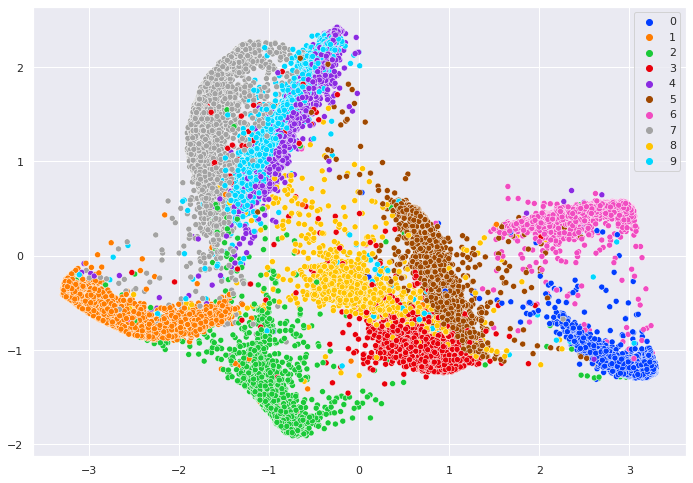

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_1[:,0], embedding_train_1[:,1], hue=y_train, legend='full', palette=palette)


In [ ]:
#optimisation
%time embedding_train_2 = embedding_train_1.optimize(n_iter=500, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=29400.00 for 500 iterations...
Iteration   50, KL divergence 2.9454, 50 iterations in 5.2162 sec
Iteration  100, KL divergence 2.7230, 50 iterations in 4.8476 sec
Iteration  150, KL divergence 2.6129, 50 iterations in 8.4931 sec
Iteration  200, KL divergence 2.5427, 50 iterations in 10.9368 sec
Iteration  250, KL divergence 2.4932, 50 iterations in 11.9184 sec
Iteration  300, KL divergence 2.4555, 50 iterations in 14.0083 sec
Iteration  350, KL divergence 2.4258, 50 iterations in 14.7873 sec
Iteration  400, KL divergence 2.4014, 50 iterations in 17.4839 sec
Iteration  450, KL divergence 2.3808, 50 iterations in 18.8603 sec
Iteration  500, KL divergence 2.3630, 50 iterations in 19.6095 sec
   --> Time elapsed: 126.17 seconds
CPU times: user 2min 17s, sys: 452 ms, total: 2min 18s
Wall time: 2min 6s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


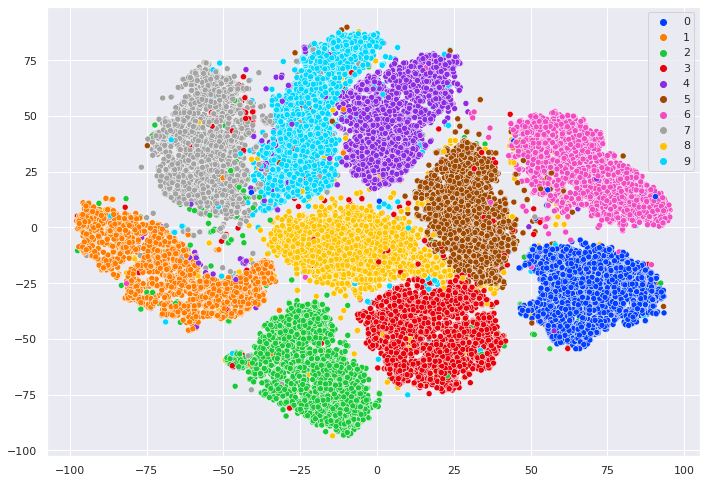

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette)

# Embed the test data

In [ ]:

%%time
embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 16.26 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.22 seconds
CPU times: user 24.8 s, sys: 433 ms, total: 25.3 s
Wall time: 16.5 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


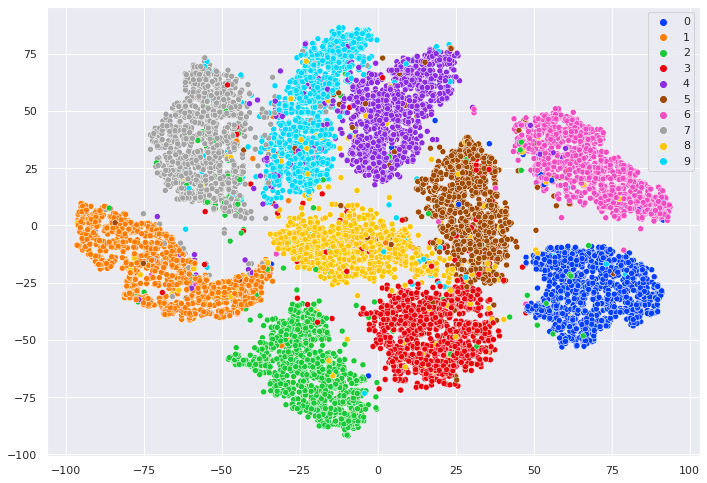

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test[:,0], embedding_test[:,1], hue=y_test, legend='full', palette=palette)

In [ ]:
%time embedding_test_1 = embedding_test.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)

===> Running optimization with exaggeration=1.00, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 174333.6750, 50 iterations in 0.5113 sec
Iteration  100, KL divergence 171493.0562, 50 iterations in 0.4912 sec
Iteration  150, KL divergence 170293.7615, 50 iterations in 0.4531 sec
Iteration  200, KL divergence 169536.7331, 50 iterations in 0.5093 sec
Iteration  250, KL divergence 168975.4750, 50 iterations in 0.5476 sec
   --> Time elapsed: 2.51 seconds
CPU times: user 5.11 s, sys: 122 ms, total: 5.24 s
Wall time: 4.78 s


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


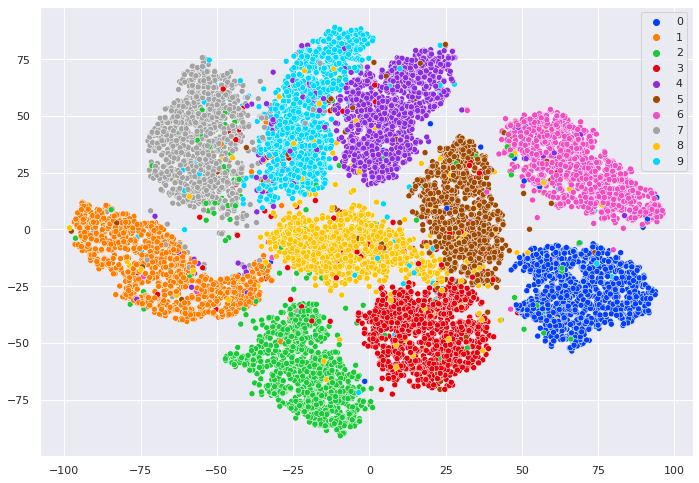

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette)

# visualization of both plots

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


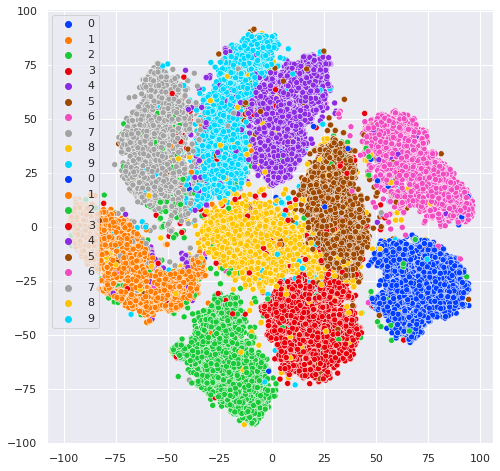

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_train_2[:,0], embedding_train_2[:,1], hue=y_train, legend='full', palette=palette)
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
sns.scatterplot(embedding_test_1[:,0], embedding_test_1[:,1], hue=y_test, legend='full', palette=palette)

# Evaluation of clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans_tsne_embedding=KMeans(n_clusters=10,n_init=100,max_iter=400,init='k-means++',random_state=42).fit(embedding_train_2)
label1=kmeans_tsne_embedding.fit_predict(x_test)

In [ ]:

kmeans_tsne=KMeans(n_clusters=10,n_init=100,max_iter=400,init='k-means++',random_state=42).fit(embedding_test_1)
label2=kmeans_tsne_embedding.fit_predict(x_test)

In [ ]:
from sklearn.metrics import silhouette_score
print("kmeans tsne scaled silhouette score: {}".format(silhouette_score(embedding_test_1,kmeans_tsne.labels_,metric='euclidean')))

In [ ]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(label1,label2,average_method='arithmetic')